<a href="https://colab.research.google.com/github/mldmort/Mortazavi2021_B6B10/blob/main/Colab_Notebooks/Expression_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To run this script


---


Upload the file `rpkm_b6b10_normalized_CPM1.txt` from [here](https://drive.google.com/drive/u/1/folders/1g6WIabQRq3H0IpUBDZSswbRIbpRDYjY6) into the content folder of this page.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb

expr data:
             Strain Group  ...  ENSMUSG00000073643  ENSMUSG00000033306
0    C57BL_10ScNHsd   B10  ...            8.517095            1.388428
1    C57BL_10ScNHsd   B10  ...            8.332748            1.539882
2       C57BL_6NTac    B6  ...            8.379150            0.872100
3       C57BL_6NTac    B6  ...            9.022093            1.100401
4       C57BL_6NCrl    B6  ...            8.364243            0.897397
..              ...   ...  ...                 ...                 ...
101  C57BL_10ScNHsd   B10  ...            6.686654            0.961804
102  C57BL_10ScNHsd   B10  ...            6.884743            0.961849
103     C57BL_6NHsd    B6  ...            6.905566            0.788630
104     C57BL_6NTac    B6  ...            8.179379            0.841050
105  C57BL_10ScNHsd   B10  ...            7.447013            1.175728

[106 rows x 6 columns]
KCNC2 expression:


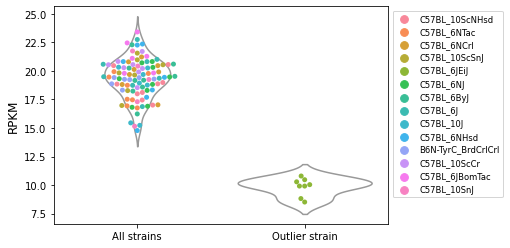

Srp54b expression:


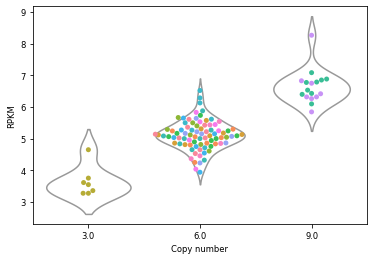

WDFY1 expression:


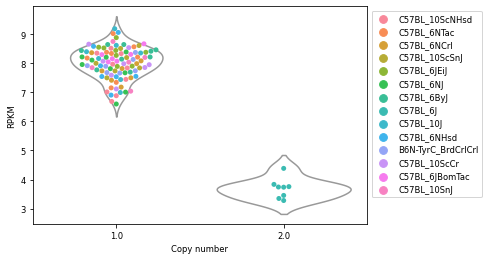

LPP expression:


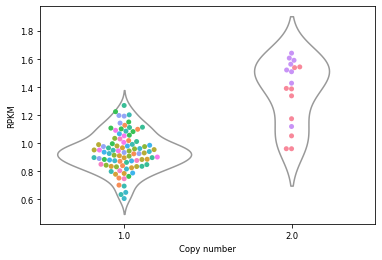

In [ ]:
expr_file = 'rpkm_b6b10_normalized_CPM1.txt'
expr_data = pd.read_table(expr_file, header=0, index_col=None)
expr_data = expr_data[['Strain', 'Group', 'ENSMUSG00000035681', 'ENSMUSG00000079108', 'ENSMUSG00000073643', 'ENSMUSG00000033306']]
print('expr data:')
print(expr_data)

expr_data['Kcnc2_comment'] = expr_data.Strain.apply(lambda x: 'Outlier strain' if x=='C57BL_6JEiJ' else 'All strains')

gene_id = 'ENSMUSG00000035681'
gene_sym = 'Kcnc2'
fig = plt.figure()
ax = sb.violinplot(x=gene_sym+'_comment', y=gene_id, data=expr_data, color='white', inner=None)
ax = sb.swarmplot(x=gene_sym+'_comment', y=gene_id, hue='Strain', data=expr_data, size=5)
ax.set_ylabel('RPKM',fontsize='large')
ax.set_xlabel(None)
plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize='small')
print('KCNC2 expression:')
plt.show()
plt.close()

strain_cn = {'C57BL_6J':6, 'C57BL_6NJ':6, 'C57BL_6ByJ':9, 'C57BL_6JEiJ':6, 'C57BL_6NTac':6, 'C57BL_6NCrl':6, 'C57BL_6NHsd':6, 'B6N-TyrC_BrdCrlCrl':6, 'C57BL_6JBomTac':6, 'C57BL_10ScSnJ':3, 'C57BL_10SnJ':6, 'C57BL_10ScCr':9, 'C57BL_10J':6, 'C57BL_10ScNHsd':6}
for index in expr_data.index.tolist():
    expr_data.loc[index, 'Srp54b_cn'] = strain_cn[expr_data.loc[index, 'Strain']]

strain_cn = {'C57BL_6J':2, 'C57BL_6NJ':1, 'C57BL_6ByJ':1, 'C57BL_6JEiJ':1, 'C57BL_6NTac':1, 'C57BL_6NCrl':1, 'C57BL_6NHsd':1, 'B6N-TyrC_BrdCrlCrl':1, 'C57BL_6JBomTac':1, 'C57BL_10ScSnJ':1, 'C57BL_10SnJ':1, 'C57BL_10ScCr':1, 'C57BL_10J':1, 'C57BL_10ScNHsd':1}
for index in expr_data.index.tolist():
    expr_data.loc[index, 'WDFY1_cn'] = strain_cn[expr_data.loc[index, 'Strain']]

strain_cn = {'C57BL_6J':1, 'C57BL_6NJ':1, 'C57BL_6ByJ':1, 'C57BL_6JEiJ':1, 'C57BL_6NTac':1, 'C57BL_6NCrl':1, 'C57BL_6NHsd':1, 'B6N-TyrC_BrdCrlCrl':1, 'C57BL_6JBomTac':1, 'C57BL_10ScSnJ':1, 'C57BL_10SnJ':1, 'C57BL_10ScCr':2, 'C57BL_10J':1, 'C57BL_10ScNHsd':2}
for index in expr_data.index.tolist():
    expr_data.loc[index, 'LPP_cn'] = strain_cn[expr_data.loc[index, 'Strain']]

GENE_IDs = [ 'ENSMUSG00000079108', 'ENSMUSG00000073643', 'ENSMUSG00000033306']
GENE_SYM = ['Srp54b', 'WDFY1', 'LPP']
for i, gene_id in enumerate(GENE_IDs):
    gene_sym = GENE_SYM[i]
    fig = plt.figure()
    ax = sb.violinplot(x=gene_sym+'_cn', y=gene_id, data=expr_data, color='white', inner=None)
    ax = sb.swarmplot(x=gene_sym+'_cn', y=gene_id, hue='Strain', data=expr_data, size=5)
    if gene_sym=='WDFY1':
        plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize='small')
    else:
        ax.legend_.remove()
    ax.set_ylabel('RPKM',fontsize='small')
    ax.set_xlabel('Copy number',fontsize='small')
    plt.xticks(fontsize='small')
    plt.yticks(fontsize='small')
    print(gene_sym+' expression:')
    plt.show()
    plt.close()
